In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import corner

In [31]:
file_folder = os.path.expanduser(r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X')
filename = "hecto_ds_np.fits"

datafile = os.path.join(file_folder, filename)

print(datafile)

C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_ds_np.fits


In [32]:
with fits.open(datafile) as hdu:
    hdu.info()

data_tp, header_tp = fits.getdata(datafile, header=True)
header_tp

Filename: C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_ds_np.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     34   30000R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  104 / length of dimension 1                          
NAXIS2  =                30000 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
TTYPE1  = 'Teff    '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = '[Fe/H]  '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = '[a/Fe]  '        

In [33]:
data_tp.dtype

dtype((numpy.record, [('Teff', '>f8'), ('[Fe/H]', '>f8'), ('[a/Fe]', '>f8'), ('log(g)', '>f8'), ('lsf', '>f8'), ('pc0', '>f8'), ('pc1', '>f8'), ('pc2', '>f8'), ('pc3', '>f8'), ('specjitter', '>f8'), ('vmic', '>f8'), ('vrad', '>f8'), ('vstar', '>f8')]))

In [34]:
data_tp['[Fe/H]']

array([-0.00424253, -0.03027897,  0.04083021, ...,  0.02546761,
        0.0660861 ,  0.01465776], dtype='>f8')

In [35]:
data_tp['Teff']

array([5223.14895748, 5143.63459565, 5247.66796627, ..., 5230.7226035 ,
       5330.98428769, 5168.66565231], dtype='>f8')

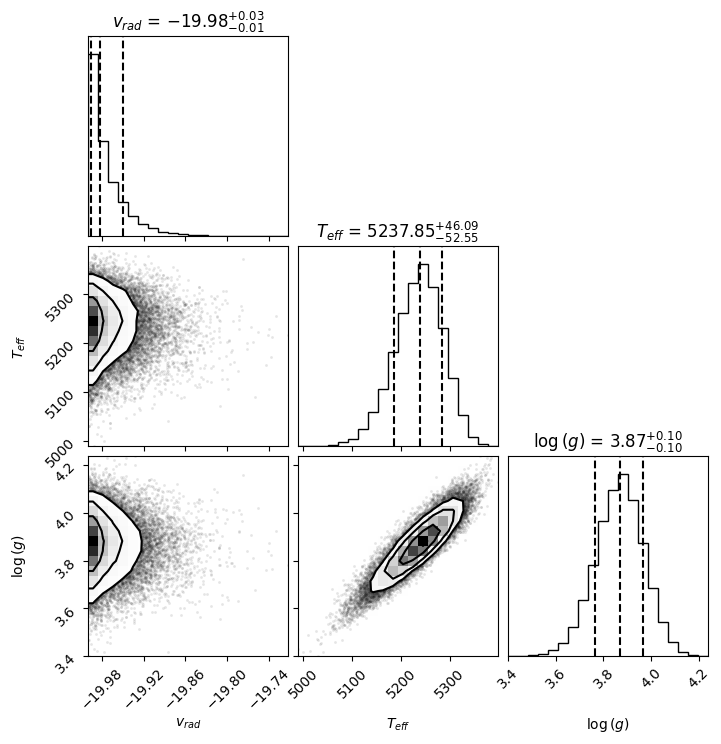

In [36]:
data_tp1 = np.vstack([data_tp['vrad'], data_tp['Teff'], data_tp['log(g)']]).T
figure = corner.corner(
                        data_tp1,
                        labels = [
                                r"$v_{rad}$",
                                r"$T_{eff}$",
                                r"$\log{(g)}$"
                                ],
                        quantiles=[0.16,0.5,0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12},
                    )

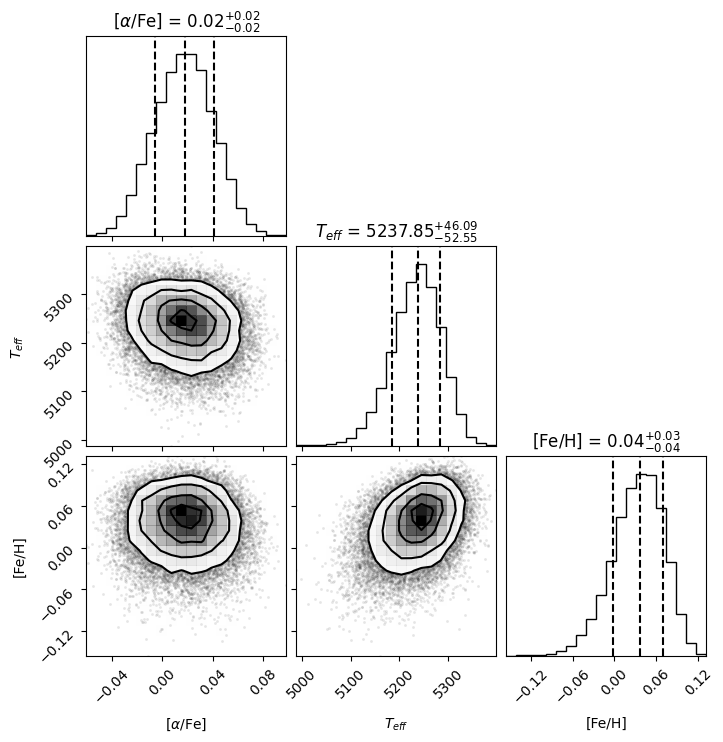

In [37]:
data_tp2 = np.vstack([data_tp['[a/Fe]'], data_tp['Teff'], data_tp['[Fe/H]']]).T
figure = corner.corner(
    data_tp2,
    labels = [
        r"[$\alpha$/Fe]",
        r"$T_{eff}$",
        r"[Fe/H]"
    ],
    quantiles=[0.16,0.5,0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)